Tarea: Analisis exploratorio con Topic Modeling
1. Extraer las noticias de una semana especifica en los medios de la region de Los Lagos
2. Extraer los topicos utilizando LDA
3. Identificar, por cada comuna, cuales son los topicos más importantes

# Ingegrante : RODRIGO ZAMBRANO HIDALGO

### 1. Extraer las noticas de una semana especifica en los medios de la región de los lagos


In [1]:
import elasticsearch
from datetime import datetime


In [2]:
elasticsearch.__version__
country="chile"
from_="2021-01-01"
to_="2021-01-07"
media_outlets=["elllanquihue","elaustral","laestrelladechiloe","elheraldoaustral","radiosago",
               "elrepuertero","elvacanudo","elhuemul","seminariolocal","elquellonino","elinsular",
               "radiopudeto","radioacogida","elcalbucano","segundos33",
               "prensadelestuario","fresiaahora","soychiloe"]

keyword=""
simple_keyword=False


In [3]:
IP = "search.sophia2.org"
PORT = 9200
USER= "elastic"
PASS= "dummy_elastic"

In [4]:
#NO MODIFICAR

es = elasticsearch.Elasticsearch(
    IP,
    #port=PORT,
    http_auth=(USER, PASS)
)

In [5]:
#NO MODIFICAR
match=""
if (simple_keyword):
    match="match"
else:
    match="match_phrase"

query = { 
    "bool": { 
      #"must": [
      #  {match: { "text":keyword}}

      #],
    "filter": [
        {"range": {
      "date": {
        "gte": from_,
        "lt": to_
      }}},
        { "term":  { "country": country }},
        { "terms":  { "media_outlet": media_outlets }} 
    ]
    }  
}

In [6]:
res = es.search(index="news", query=query, size=10000)
print("Son %d noticias encontradas..." % res['hits']['total']['value'])

Son 1009 noticias encontradas...


In [8]:
import pandas as pd

data = {'id_news':[],'country':[],'media_outlet':[],'url':[],'title':[],'text':[],'date':[],'search':[]}

df = pd.DataFrame(data)  
  
for hit in res['hits']['hits']:
    id_news = hit['_source']['id_news']
    country = hit['_source']['country']
    media_outlet = hit['_source']['media_outlet']
    url = hit['_source']['url']
    title = hit['_source']['title']
    text = hit['_source']['text']
    date = hit['_source']['date']
    search = keyword
    
    new_row = {'id_news':id_news, 'country':country, 'media_outlet':media_outlet, 'url':url, 'title':title, 'text':text, 'date':date, 'search':search}
    
    df = df.append(new_row, ignore_index=True)

df


,id_news,country,media_outlet,url,title,text,date,search
0,21921579.0,chile,radiosago,https://www.radiosago.cl/investigan-el-tercer-...,Investigan el tercer homicidio de un interno d...,El tercer homicidio en lo poco que va de este ...,2021-01-06,
1,21921597.0,chile,radiosago,https://www.radiosago.cl/municipio-de-puyehue-...,Municipio de Puyehue destina 100 millones de p...,"Dicho programa, financiado por el Gobierno Reg...",2021-01-05,
2,21921639.0,chile,radiosago,https://www.radiosago.cl/actividad-lechera-y-c...,Actividad lechera y cárnica regional cerraron ...,Un balance positivo de las principales activid...,2021-01-04,
3,21921640.0,chile,radiosago,https://www.radiosago.cl/region-de-los-rios-at...,Región de Los Ríos: Ataque incendiario se prod...,Los hechos se produjeron ayer lunes 4 de enero...,2021-01-05,
4,21921642.0,chile,radiosago,https://www.radiosago.cl/felipe-gottschalk-asu...,Felipe Gottschalk asume como nuevo Gerente Gen...,Tras diez años al mando de Cooprinsem y más de...,2021-01-06,
...,...,...,...,...,...,...,...,...
1004,47501485.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,Curry sigue encendido y aportó 30 puntos en só...,Un día después de batir su récord personal enc...,2021-01-06,
1005,47501486.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,¿Dónde es más seguro hospedarse para veranear ...,Más de 45 mil permisos de vacaciones entregó l...,2021-01-06,
1006,47501487.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,Piden 34 años de cárcel para 'El Temucano' por...,"Tras varias diligencias, la Fiscalía Metropoli...",2021-01-06,
1007,47501488.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,Slack presentó una falla importante y no fue l...,La herramienta de comunicación y trabajo en gr...,2021-01-06,


In [9]:
df['url'].duplicated().any()


True

In [10]:
df = df.drop_duplicates(subset='url', keep='first')


In [11]:
df

,id_news,country,media_outlet,url,title,text,date,search
0,21921579.0,chile,radiosago,https://www.radiosago.cl/investigan-el-tercer-...,Investigan el tercer homicidio de un interno d...,El tercer homicidio en lo poco que va de este ...,2021-01-06,
1,21921597.0,chile,radiosago,https://www.radiosago.cl/municipio-de-puyehue-...,Municipio de Puyehue destina 100 millones de p...,"Dicho programa, financiado por el Gobierno Reg...",2021-01-05,
2,21921639.0,chile,radiosago,https://www.radiosago.cl/actividad-lechera-y-c...,Actividad lechera y cárnica regional cerraron ...,Un balance positivo de las principales activid...,2021-01-04,
3,21921640.0,chile,radiosago,https://www.radiosago.cl/region-de-los-rios-at...,Región de Los Ríos: Ataque incendiario se prod...,Los hechos se produjeron ayer lunes 4 de enero...,2021-01-05,
4,21921642.0,chile,radiosago,https://www.radiosago.cl/felipe-gottschalk-asu...,Felipe Gottschalk asume como nuevo Gerente Gen...,Tras diez años al mando de Cooprinsem y más de...,2021-01-06,
...,...,...,...,...,...,...,...,...
595,22516853.0,chile,elheraldoaustral,https://www.eha.cl/noticia/local/hasta-el-11-d...,Hasta el 11 de enero hay plazo para el patroci...,Hasta el 11 de Enero hay plazo para patrocinar...,2021-01-06,
596,22520185.0,chile,elheraldoaustral,https://www.eha.cl/noticia/actualidad/minister...,Ministerio de las Culturas lanza curso de Inte...,"Desde el 4 de enero, en el sitio web de “Jóven...",2021-01-06,
611,22596703.0,chile,elcalbucano,https://www.elcalbucano.cl/2021/01/alcalde-ver...,Alcalde Vera inició el año apelando al autocui...,Ante relajación en las medidas de seguridad pa...,2021-01-02,
669,47500322.0,chile,elllanquihue,https://www.ellanquihue.cl/impresa/2021/01/04/...,"""Es muy fácil criticar con los ojos de hoy lo ...","El vicepresidente del Senado, Rabindranath Qui...",2021-01-04,


In [12]:
nombre_archivo=keyword.replace(' ', '')+country+"_"+from_+"_"+to_+".csv"
print("El archivo se llama:")
print(nombre_archivo)
df.to_csv("./"+nombre_archivo)

El archivo se llama:
chile_2021-01-01_2021-01-07.csv


### 2. Extraer los topicos utilizando LDA

In [135]:
import spacy
nlp = spacy.load("es_core_news_md")
from spacy.matcher import Matcher

from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)


In [136]:
cities = ["Ancud","Castro","Chonchi",
           "Curaco de Vélez", "Dalcahue","Puqueldón",
          "Queilén","Quemchi","Quellón",
           "Quinchao","Calbuco","Cochamó",
          "Fresia","Frutillar","Llanquihue",
           "Los Muermos","Maullín","Puerto Montt",
          "Puerto Varas","Osorno","Puerto Octay",
          "Purranque","Puyehue","Río Negro",
           "San Juan de la Costa","San Pablo","Chaitén",
          "Futaleufú","Hualaihué","Palena"]

In [137]:
matcher_cities = PhraseMatcher(nlp.vocab)

for city in cities:
    matcher_cities.add(city, [nlp(city)])


In [138]:

len(matcher_cities)


30

In [139]:
import pandas

# leer el archivo CSV
archivo = "chile_2021-01-01_2021-01-07.csv"
corpus    = pandas.read_csv(archivo)

In [140]:
corpus.drop('Unnamed: 0', axis=1, inplace=True)  

corpus.head(5)


,id_news,country,media_outlet,url,title,text,date,search
0,21921579.0,chile,radiosago,https://www.radiosago.cl/investigan-el-tercer-...,Investigan el tercer homicidio de un interno d...,El tercer homicidio en lo poco que va de este ...,2021-01-06,NaN
1,21921597.0,chile,radiosago,https://www.radiosago.cl/municipio-de-puyehue-...,Municipio de Puyehue destina 100 millones de p...,"Dicho programa, financiado por el Gobierno Reg...",2021-01-05,NaN
2,21921639.0,chile,radiosago,https://www.radiosago.cl/actividad-lechera-y-c...,Actividad lechera y cárnica regional cerraron ...,Un balance positivo de las principales activid...,2021-01-04,NaN
3,21921640.0,chile,radiosago,https://www.radiosago.cl/region-de-los-rios-at...,Región de Los Ríos: Ataque incendiario se prod...,Los hechos se produjeron ayer lunes 4 de enero...,2021-01-05,NaN
4,21921642.0,chile,radiosago,https://www.radiosago.cl/felipe-gottschalk-asu...,Felipe Gottschalk asume como nuevo Gerente Gen...,Tras diez años al mando de Cooprinsem y más de...,2021-01-06,NaN


In [141]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
for index,row in corpus.iterrows():
    print(index)
    txt = row["text"]
    
    try:
    
        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span

            print(span.text)
    
    except:
        pass


0
1
Puyehue
Puyehue
Puyehue
2
3
4
5
6
Cochamó
Hualaihué
Chaitén
Palena
7
Llanquihue
Llanquihue
8
Osorno
Osorno
Osorno
9
Osorno
Osorno
10
Osorno
Osorno
Osorno
Osorno
11
Osorno
Osorno
12
Osorno
Osorno
San Pablo
Osorno
13
Osorno
Osorno
Osorno
14
Osorno
Osorno
Osorno
Osorno
Osorno
Puerto Montt
15
Llanquihue
Llanquihue
16
Puerto Montt
Puerto Montt
Puerto Montt
Puerto Varas
17
Puerto Varas
Puerto Varas
Puerto Varas
Puerto Varas
18
19
Puerto Montt
Osorno
Quellón
Castro
20
Puerto Varas
Maullín
21
Puerto Montt
Puerto Montt
Puerto Montt
22
Puerto Varas
Maullín
Puerto Varas
Maullín
Puerto Varas
Maullín
Puerto Varas
Llanquihue
23
Puerto Octay
24
25
Puerto Varas
Puerto Varas
Puerto Varas
26
Ancud
Ancud
27
Puerto Montt
Puerto Montt
28
29
30
31
32
33
34
35
36
37
38
Puerto Montt
39
40
Osorno
41
42
43
44
45
Palena
Palena
Puerto Montt
Futaleufú
Palena
Palena
Puerto Montt
Palena
46
Puerto Montt
Puerto Montt
Puerto Montt
47
48
Osorno
Puerto Montt
49
Puerto Montt
50
Puerto Montt
Puerto Montt
Ancud
Puerto M

Puerto Montt
Llanquihue
Puerto Montt
Puerto Montt
Puerto Montt
Llanquihue
318
Curaco de Vélez
Castro
Puqueldón
Quellón
Quinchao
Quinchao
Quellón
319
Castro
Puqueldón
320
Ancud
Ancud
Ancud
Ancud
Ancud
Ancud
Ancud
Ancud
Ancud
Ancud
Ancud
321
322
Ancud
323
324
325
326
Osorno
Llanquihue
Castro
Ancud
Dalcahue
Puqueldón
Quellón
Quemchi
Quinchao
Llanquihue
Osorno
Palena
Osorno
Llanquihue
Castro
Ancud
Quellón
Quellón
Quellón
Quellón
327
Castro
Castro
Castro
328
Castro
Ancud
Castro
Quellón
Dalcahue
Chonchi
329
Palena
Puerto Montt
Calbuco
Cochamó
Maullín
Castro
Ancud
Puerto Montt
Quinchao
Chonchi
330
Curaco de Vélez
Curaco de Vélez
331
Ancud
Dalcahue
Quemchi
Ancud
Dalcahue
Quemchi
332
333
334
335
336
Castro
Ancud
Curaco de Vélez
Dalcahue
Puqueldón
Quellón
Quemchi
Quinchao
Ancud
Castro
Dalcahue
Quellón
Quinchao
Chonchi
Puqueldón
Curaco de Vélez
Quemchi
Llanquihue
Osorno
Palena
Llanquihue
Osorno
Palena
Castro
Ancud
Quinchao
Curaco de Vélez
Dalcahue
Castro
Quellón
337
Quellón
Quellón
338
339
Quelló

In [143]:
dataset_cities = corpus 

for city in cities:
    dataset_cities.insert(7,city.replace(" ","_"),0)

In [144]:
dataset_cities.columns.values


array(['id_news', 'country', 'media_outlet', 'url', 'title', 'text',
       'date', 'Palena', 'Hualaihué', 'Futaleufú', 'Chaitén', 'San_Pablo',
       'San_Juan_de_la_Costa', 'Río_Negro', 'Puyehue', 'Purranque',
       'Puerto_Octay', 'Osorno', 'Puerto_Varas', 'Puerto_Montt',
       'Maullín', 'Los_Muermos', 'Llanquihue', 'Frutillar', 'Fresia',
       'Cochamó', 'Calbuco', 'Quinchao', 'Quellón', 'Quemchi', 'Queilén',
       'Puqueldón', 'Dalcahue', 'Curaco_de_Vélez', 'Chonchi', 'Castro',
       'Ancud', 'search'], dtype=object)

In [145]:
for index,row in dataset_cities.iterrows():
    print(index)
    txt = row["text"]
    
    try:
    
        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span
            dataset_cities.at[index,span.text.replace(" ","_")]=1
    except Exception as e:
        print(e)
        pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [146]:
noticias = dataset_cities.text.values.tolist()

In [147]:
nlp = spacy.load("es_core_news_sm")
matcher = Matcher(nlp.vocab)

In [148]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

In [149]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

In [150]:
noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [151]:
print(noticias[2])


Un balance positivo de las principales actividades ganaderas del territorio se desprende de los últimos boletines del sector lácteo y de la carne bovina elaborados por la Oficina de Estudios y Políticas Agrarias (ODEPA), los que dan cuenta del repunte que han experimentado ambas actividades durante los primeros diez meses del reciente 2020. Al respecto, el Seremi de Agricultura de la región de Los Lagos, Eduardo Winkler, señaló que la actividad ganadera será un fuerte impulsor de la reactivación económica local. En efecto, de acuerdo al último Boletín de la leche de ODEPA hay un incremento de un 6,3% en la recepción nacional de leche cruda, creciendo en 105,7 millones de litros respecto del 2019. En relación a los precios promedios de leche pagado a productor, la Región de Los Lagos muestra un alza de 18,5% por litro de leche, acumulado durante los primeros 10 meses del año, alcanzando los $299,32 por litro en promedio. Por su parte, la actividad cárnica de bovinos también revela cifra

In [152]:
print(noticias_procesadas[5])


['ampliación', 'plazo', 'investigación', 'caso', 'crimen', 'joven', 'espera', 'resultados', 'informes', 'informe', 'homicidio', 'joven', 'abril', 'pasado', 'cuerpo', 'mayo', 'río', 'altura', 'sector', 'información', 'cuanto', 'diligencias', 'brigada', 'elementos', 'comisión', 'delito', 'respecto', 'martes', 'audiencia', 'ampliación', 'plazo', 'días', 'desarrollo', 'diligencias', 'sentido', 'instrucción', 'dudas', 'entorno', 'informe', 'persecutor', 'espera', 'informes', 'diligencias', 'policías', 'acusación', '-eventualmente-', 'someterlos', 'juicio', 'Fuente', 'Helena Bustos', 'Comisario Rodrigo Morales', 'Fiscal Jaime', 'ampliación de plazo', 'resultados de informes', 'informes periciales', 'diligencias investigativas', 'brigada especializada', 'elementos probatorios', 'ampliación de plazo', 'diligencias pendientes', 'instrucción particular', 'espera de informes', 'informes periciales', 'juicio oral']


In [153]:
# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
texts = noticias_procesadas
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]
# View
print(dataset[:5])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2)], [(0, 1), (13, 1), (51, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 4), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1)], [(64, 1),

In [154]:

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [155]:
lda_model.save('lda_model_ciudades')


In [156]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [157]:
start=2
limit=15
step=2
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dataset, texts=noticias_procesadas, start=start, limit=limit, step=step)


2
4
6
8
10
12
14


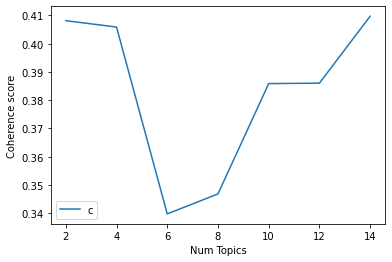

In [158]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [159]:

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4081
Num Topics = 4  has Coherence Value of 0.4059
Num Topics = 6  has Coherence Value of 0.3398
Num Topics = 8  has Coherence Value of 0.3468
Num Topics = 10  has Coherence Value of 0.3859
Num Topics = 12  has Coherence Value of 0.386
Num Topics = 14  has Coherence Value of 0.4097


In [160]:
# Select the model and print the topics
optimal_model = model_list[4]

In [161]:
archivo='optimal_model_ciudades'
optimal_model.save(archivo)


In [162]:
from gensim.models import LdaModel

optimal_model = LdaModel.load(archivo, mmap='r')

# Visualizar los topicos

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, dataset, id2word)
vis


C:\Users\rszh9\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.195481  0.049572       1        1  21.027816
6     -0.018759  0.190027       2        1  18.876960
5      0.186723  0.043978       3        1  16.935742
0      0.170931 -0.108246       4        1  14.572612
4     -0.069234 -0.174712       5        1   9.494391
8     -0.001667 -0.119509       6        1   7.537499
1     -0.056965  0.101471       7        1   5.874202
2     -0.133730  0.005562       8        1   2.247597
3     -0.134503  0.008950       9        1   1.971132
7     -0.138278  0.002907      10        1   1.462049, topic_info=              Term        Freq       Total Category  logprob  loglift
752          casos  217.000000  217.000000  Default  30.0000  30.0000
588           fase   81.000000   81.000000  Default  29.0000  29.0000
1304        prueba   55.000000   55.000000  Default  28.0000  28.0000
67          comuna  129.000000  129.000000  Default  27.0000  27.0000
64             año  283.000000  283.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
359   conservación    1.970561   19.566216  Topic10  -5.7373   1.9298
509          mujer    1.754358   13.137067  Topic10  -5.8535   2.2120
516           vida    1.887987   67.041084  Topic10  -5.7801   0.6555
17            edad    1.422516   15.196499  Topic10  -6.0632   1.8567
343        sentido    1.411645   36.482589  Topic10  -6.0708   0.9733

[584 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
5164      1  0.916902   2017
107       1  0.935809   2019
107       7  0.058488   2019
108       1  0.318945   2020
108       2  0.425260   2020
...     ...       ...    ...
299       4  0.087976   zona
299       5  0.281524   zona
299       6  0.175953   zona
299       7  0.017595   zona
3496      4  0.976135  zonas

[985 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 6, 1, 5, 9, 2, 3, 4, 8])

In [186]:
def format_topics_documents(ldamodel=None, corpus=dataset, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_documents(ldamodel=optimal_model, corpus=dataset, texts=noticias)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.7467,"fase, permiso, comuna, comunas, vacaciones, au...",El tercer homicidio en lo poco que va de este ...
1,1,5.0,0.6734,"día, personas, años, año, millones, país, días...","Dicho programa, financiado por el Gobierno Reg..."
2,2,1.0,0.8029,"prueba, año, datos, pandemia, estudiantes, est...",Un balance positivo de las principales activid...
3,3,0.0,0.9541,"casos, personas, contagios, pandemia, medidas,...",Los hechos se produjeron ayer lunes 4 de enero...
4,4,5.0,0.9915,"día, personas, años, año, millones, país, días...",Tras diez años al mando de Cooprinsem y más de...
5,5,8.0,0.7155,"fase, permiso, comuna, comunas, vacaciones, au...",El Tribunal de Garantía de Valdivia otorgó una...
6,6,4.0,0.9240,"comuna, proyecto, vecinos, años, obra, sector,...",Se trata de un instrumento de planificación pa...
7,7,8.0,0.7050,"fase, permiso, comuna, comunas, vacaciones, au...",Actualmente en la comuna de Llanquihue existe ...
8,8,3.0,0.6553,"alcaldes, presupuesto, organizaciones, trabajo...","Si todo marcha de acuerdo a lo programado, lle..."
9,9,8.0,0.3136,"fase, permiso, comuna, comunas, vacaciones, au...",La comuna de Osorno este martes inoculó a cuat...


### 3. Identificar, por cada comuna, cuales son los topicos más importantes

In [187]:
cities = ["Ancud","Castro","Chonchi",
           "Curaco_de_Vélez", "Dalcahue","Puqueldón",
          "Queilén","Quemchi","Quellón",
           "Quinchao","Calbuco","Cochamó",
          "Fresia","Frutillar","Llanquihue",
           "Los_Muermos","Maullín","Puerto_Montt",
          "Puerto_Varas","Osorno","Puerto_Octay",
          "Purranque","Puyehue","Río_Negro",
           "San_Juan_de_la_Costa","San_Pablo","Chaitén",
          "Futaleufú","Hualaihué","Palena"]

cities_filter  = corpus.filter(cities, axis=1)
df_dominant_topic= df_dominant_topic.join(cities_filter)
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Ancud,Castro,Chonchi,Curaco_de_Vélez,Dalcahue,...,Puerto_Octay,Purranque,Puyehue,Río_Negro,San_Juan_de_la_Costa,San_Pablo,Chaitén,Futaleufú,Hualaihué,Palena
0,0,8.0,0.7467,"fase, permiso, comuna, comunas, vacaciones, au...",El tercer homicidio en lo poco que va de este ...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5.0,0.6734,"día, personas, años, año, millones, país, días...","Dicho programa, financiado por el Gobierno Reg...",0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,1.0,0.8029,"prueba, año, datos, pandemia, estudiantes, est...",Un balance positivo de las principales activid...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.0,0.9541,"casos, personas, contagios, pandemia, medidas,...",Los hechos se produjeron ayer lunes 4 de enero...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5.0,0.9915,"día, personas, años, año, millones, país, días...",Tras diez años al mando de Cooprinsem y más de...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,347,3.0,0.4777,"alcaldes, presupuesto, organizaciones, trabajo...",Hasta el 11 de Enero hay plazo para patrocinar...,0,0,0,0,0,...,1,1,1,1,0,1,0,0,0,0
348,348,6.0,0.6572,"años, enero, tiempo, parte, presidente, mundo,...","Desde el 4 de enero, en el sitio web de “Jóven...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349,349,8.0,0.4532,"fase, permiso, comuna, comunas, vacaciones, au...",Ante relajación en las medidas de seguridad pa...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,350,5.0,0.6692,"día, personas, años, año, millones, país, días...","El vicepresidente del Senado, Rabindranath Qui...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
from statistics import mode
lista_final=[]
topico=[]
for i in cities:
    for j in range(1,351):
        if df_dominant_topic[i][j] == 1:
            topico.append(df_dominant_topic["Dominant_Topic"][j]) 
    if bool(topico):
        lista_final.append(mode(topico))
    else:
        lista_final.append("No hay dato")
    topico.clear()
for k in range(len(cities)):
    print(str(cities[k])+ " el topico mas frecuente es: "+ str(lista_final[k]))



Ancud el topico mas frecuente es: 0.0
Castro el topico mas frecuente es: 0.0
Chonchi el topico mas frecuente es: 5.0
Curaco_de_Vélez el topico mas frecuente es: 0.0
Dalcahue el topico mas frecuente es: 5.0
Puqueldón el topico mas frecuente es: 0.0
Queilén el topico mas frecuente es: No hay dato
Quemchi el topico mas frecuente es: 5.0
Quellón el topico mas frecuente es: 0.0
Quinchao el topico mas frecuente es: 4.0
Calbuco el topico mas frecuente es: 0.0
Cochamó el topico mas frecuente es: 8.0
Fresia el topico mas frecuente es: 0.0
Frutillar el topico mas frecuente es: 0.0
Llanquihue el topico mas frecuente es: 0.0
Los_Muermos el topico mas frecuente es: 0.0
Maullín el topico mas frecuente es: 4.0
Puerto_Montt el topico mas frecuente es: 9.0
Puerto_Varas el topico mas frecuente es: 0.0
Osorno el topico mas frecuente es: 9.0
Puerto_Octay el topico mas frecuente es: 5.0
Purranque el topico mas frecuente es: 0.0
Puyehue el topico mas frecuente es: 8.0
Río_Negro el topico mas frecuente es: 5